In [1]:
from glob import glob
import os
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em

C:\Users\mac\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
file_path = 'C:/Users/mac/Documents/Python_Rasterio/AbayaLake/'

In [4]:
# Stack the landsat bands
# This creates a numpy array with each "layer" representing a single band
landsat_paths = glob(
    "C:/Users/mac/Documents/Python_Rasterio/AbayaLake/LC08_L1TP_169056_20190312_20190325_01_T1_*b*.tif"
)
landsat_paths.sort()
arr_st, meta = es.stack(landsat_paths)

In [5]:
# Import the landsat qa layer
with rio.open(
    "C:/Users/mac/Documents/Python_Rasterio/AbayaLake/LC08_L1TP_169056_20190312_20190325_01_T1_BQA.tif"
) as landsat_paths_cl:
    landsat_qa = landsat_paths_cl.read(1)
    landsat_ext = plotting_extent(landsat_paths_cl)

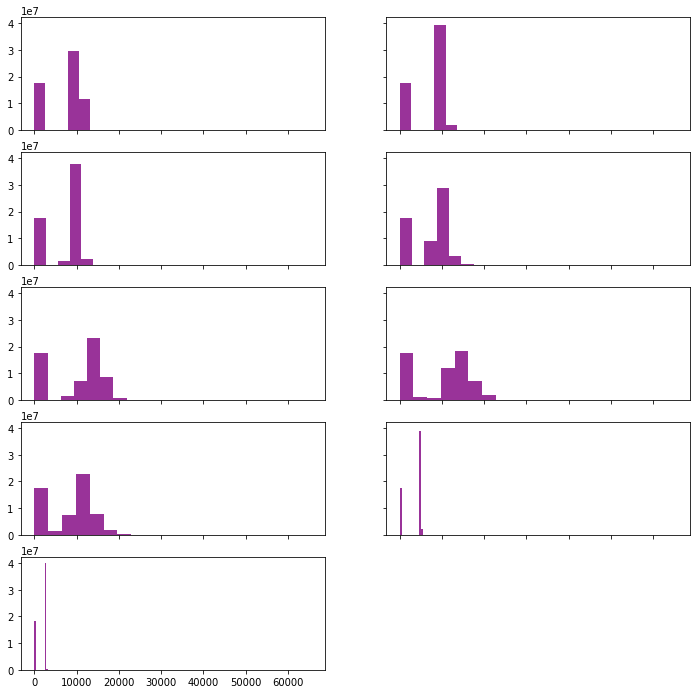

In [6]:
#Plot Histogram of Each Band
# ----------------------------------------
# You can view a histogram for each band in your dataset by using the
# ``hist()`` function from the ``earthpy.plot`` module.

ep.hist(arr_st)
plt.show()

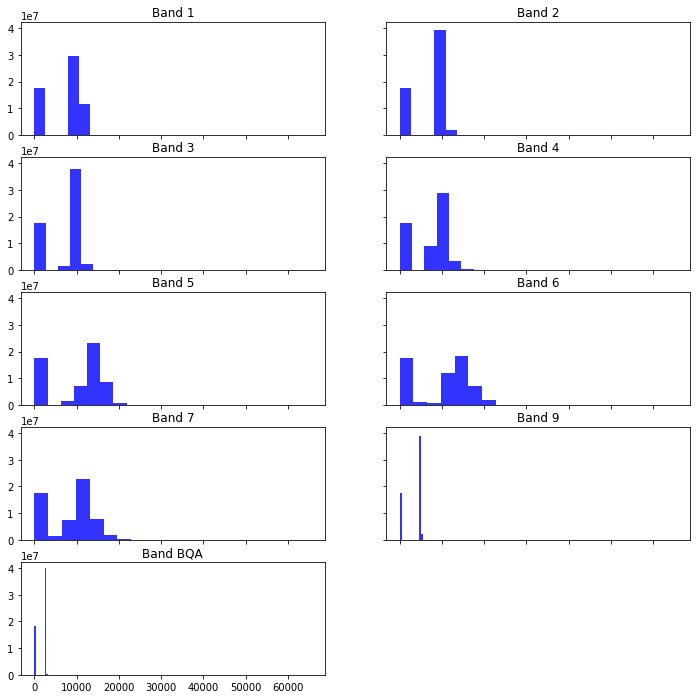

In [8]:
# Customize Histogram Plot with Titles and Colors
# -----------------------------------------------

ep.hist(
    arr_st,
    colors=["blue"],
    title=[
        "Band 1",
        "Band 2",
        "Band 3",
        "Band 4",
        "Band 5",
        "Band 6",
        "Band 7",
        "Band 9",
        "Band BQA"
    ],
)
plt.show()

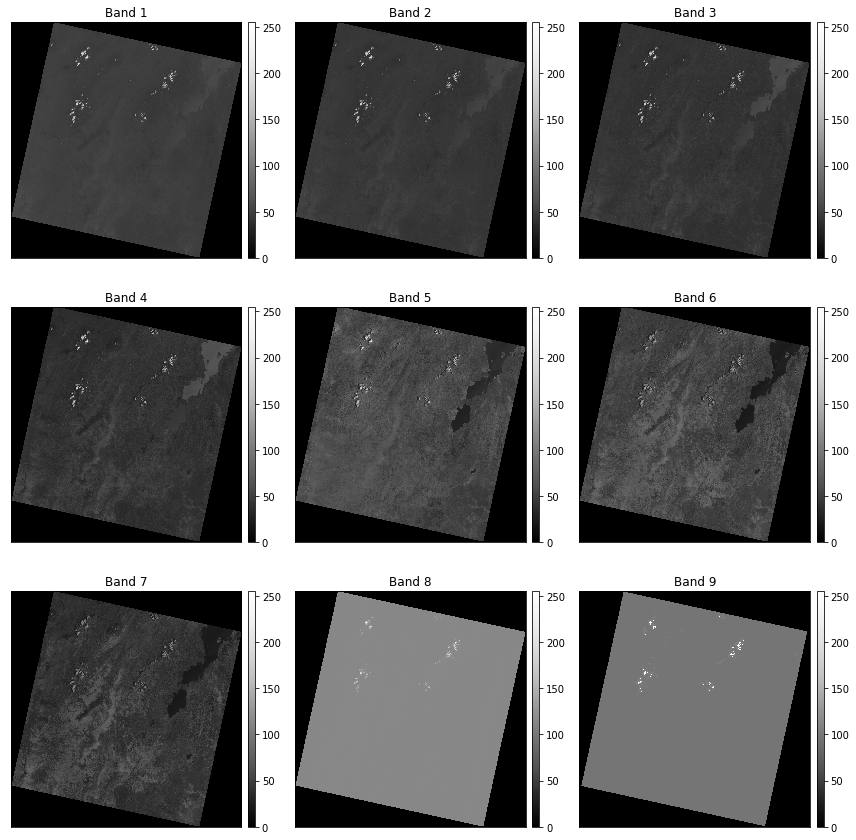

In [9]:
# View Single Band Plots
# -----------------------------------------------
# Next, have a look at the data, it looks like there is a large cloud that you
# may want to mask out.

ep.plot_bands(arr_st)
plt.show()

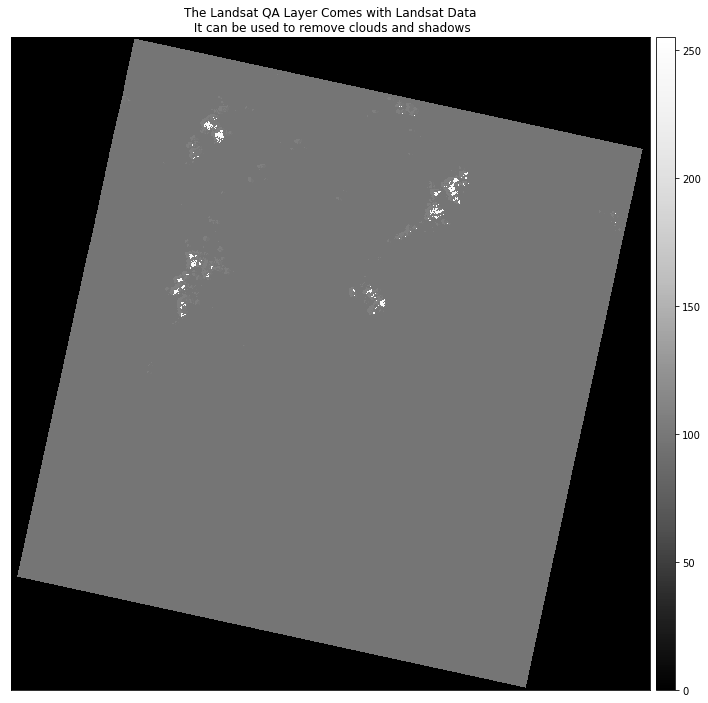

In [10]:
# Mask the Data
# -----------------------------------------------
# You can use the EarthPy ``mask()`` function to handle this cloud.
# To begin you need to have a layer that defines the pixels that
# you wish to mask. In this case, the ``landsat_qa`` layer will be used.

ep.plot_bands(
    landsat_qa,
    title="The Landsat QA Layer Comes with Landsat Data\n It can be used to remove clouds and shadows",
)
plt.show()

In [ ]:
# Plot The Masked Data
# ~~~~~~~~~~~~~~~~~~~~~
# Now apply the mask and plot the masked data. The mask applies to every band in your data.
# The mask values below are values documented in the Landsat 8 documentation that represent
# clouds and cloud shadows.

# Generate array of all possible cloud / shadow values
cloud_shadow = [328, 392, 840, 904, 1350]
cloud = [352, 368, 416, 432, 480, 864, 880, 928, 944, 992]
high_confidence_cloud = [480, 992]

# Mask the data
all_masked_values = cloud_shadow + cloud + high_confidence_cloud
arr_ma = em.mask_pixels(arr_st, landsat_qa, vals=all_masked_values)

# sphinx_gallery_thumbnail_number = 5
ep.plot_rgb(
    arr_ma, rgb=[4, 3, 2], title="Array with Clouds and Shadows Masked"
)
plt.show()